# Polynomial Regression

In [82]:
# Imports
import pandas as pd
from data_cleaning import clean_car_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [83]:
# Load the Data
cars_raw = pd.read_csv("USA_cars_datasets.csv")

In [84]:
# Clean the data
cars = clean_car_data(cars_raw)

In [85]:
# One-hot Encoding for categorical variables

# Determine categorical columns
category_columns = cars.select_dtypes('category').columns

# Drop categorical columns
cars = pd.get_dummies(cars, columns=category_columns, drop_first=True)

In [86]:
# Separate the features and target variable
x = cars.drop(columns='price')
y = cars['price']

In [87]:
# Partition the Data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [88]:
# Standardize the numeric variables
scaler = MinMaxScaler()

# Identify numeric columns
number_columns = x.select_dtypes('number').columns

# Standardize numeric features
x_train[number_columns] = scaler.fit_transform(x_train[number_columns])
x_test[number_columns] = scaler.transform(x_test[number_columns])

In [89]:
# Instantiate the regression model
model = LinearRegression()

In [90]:
# Lists to store errors
R2_train_list = []
RMSE_train_list = []
R2_test_list = []
RMSE_test_list = []

In [91]:
# Use for loop to run polynomial regression for various degrees
degrees = [2, 3, 4, 5, 6, 7, 8]

for d in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=d)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    # Train model
    model.fit(x_train_poly, y_train)

    # Predictions
    pred_train = model.predict(x_train_poly)
    pred_test = model.predict(x_test_poly)

    # Train errors
    R2_train = r2_score(y_train, pred_train)
    RMSE_train = mean_squared_error(y_train, pred_train) ** 0.5

    # Test errors
    R2_test = r2_score(y_test, pred_test)
    RMSE_test = mean_squared_error(y_test, pred_test) ** 0.5

    # Append to lists
    R2_train_list.append(R2_train)
    RMSE_train_list.append(RMSE_train)
    R2_test_list.append(R2_test)
    RMSE_test_list.append(RMSE_test)

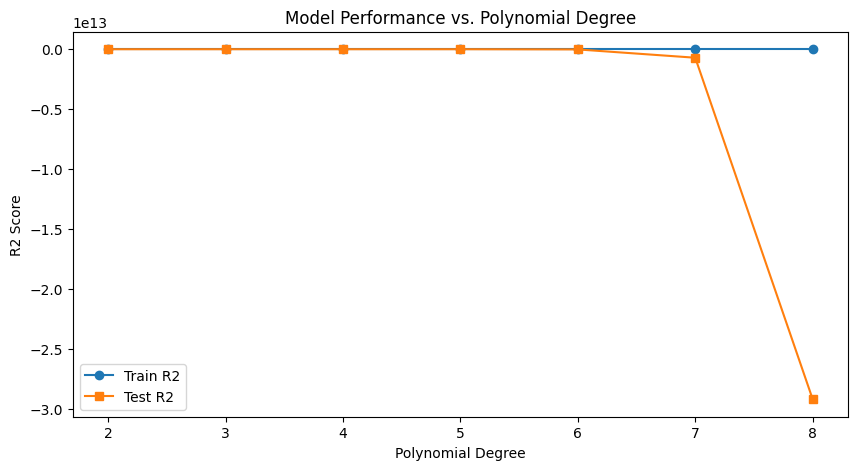

In [94]:
# Plot R2 Scores
plt.figure(figsize=(10, 5))
plt.plot(degrees, R2_train_list, label="Train R2", marker='o')
plt.plot(degrees, R2_test_list, label="Test R2", marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("R2 Score")
plt.title("Model Performance vs. Polynomial Degree")
plt.xticks(degrees)
plt.legend()
plt.show()

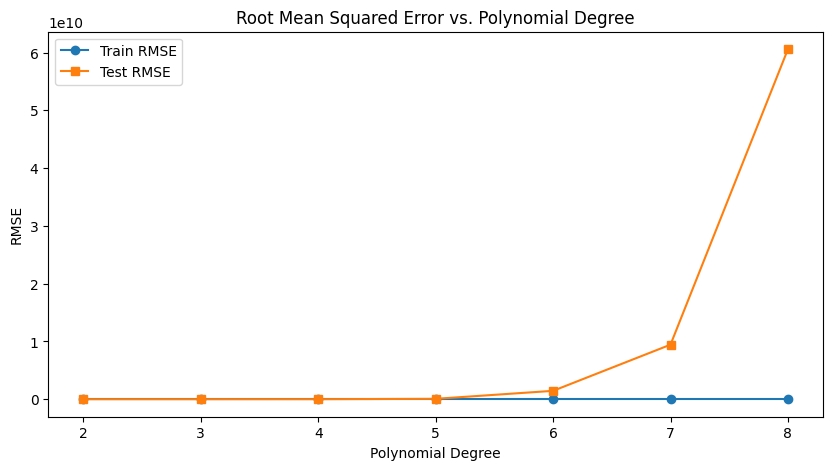

In [95]:
# Plot RMSE
plt.figure(figsize=(10, 5))
plt.plot(degrees, RMSE_train_list, label="Train RMSE", marker='o')
plt.plot(degrees, RMSE_test_list, label="Test RMSE", marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error vs. Polynomial Degree")
plt.xticks(degrees)
plt.legend()
plt.show()

In [80]:
R2_test_list

[0.1524941462464794,
 -3.5258377663736633,
 -81099.52999185146,
 -37546302.53864083,
 -16774076359.204721,
 -709828041543.6428,
 -29213398559920.914]

The polynomial expansion does not serve the model, causing it to overfit exponentially with the addition of every new degree.

In [97]:
# Extract the best polynomial model
best_r2 = max(R2_test_list)
best_degrees = R2_test_list.index(best_r2) + 2

print(f"The best polynomial model has {best_degrees} degrees.")
print("R2 Score:", best_r2)

The best polynomial model has 2 degrees.
R2 Score: 0.1524941462464794


Overall, polynomial regression did not improve the model in comparison to linear regression.